# Basic Sequences

## Unit Sample (impulse) sequences


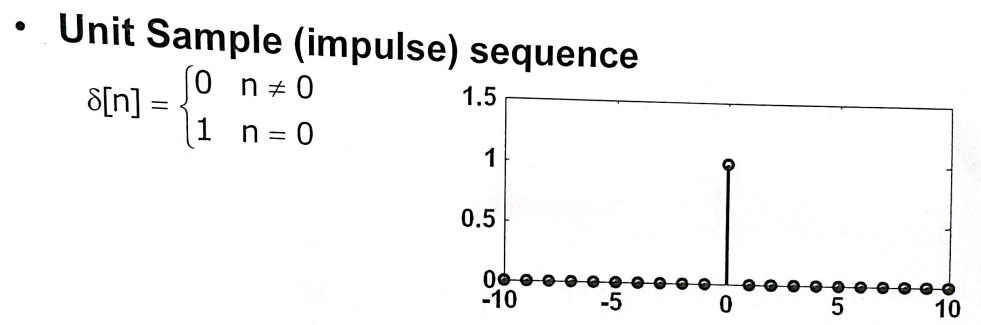

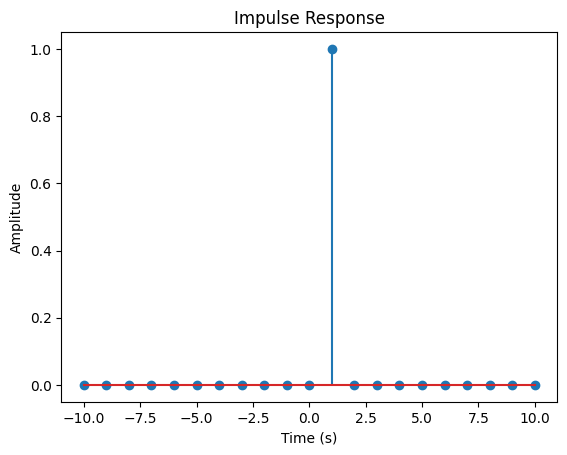

In [33]:
import numpy as np
from matplotlib import pyplot as plt

def impulse(begin, end, n, samples_per_second = 1):
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1,  endpoint = True)
    amplitude = np.zeros(shape = (end - begin) * samples_per_second + 1)    
    amplitude[(n - begin) * samples_per_second] = 1
    return amplitude, time

amplitude, time = impulse(-10, 10, 1)

plt.stem(time, amplitude)
plt.title('Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


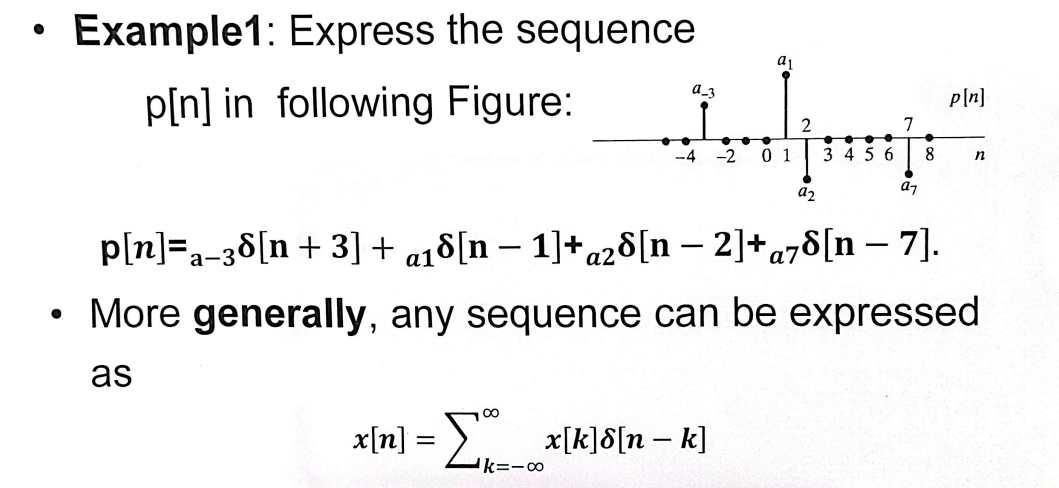

In code, $\delta[n + x]$ is represented as: impulse(begin, end, -x).

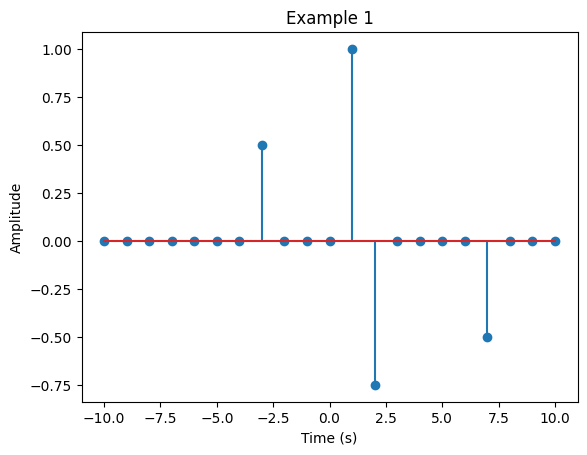

In [36]:
coefficients = [0.5, 1, -0.75, -0.5]
indexes = [-3, 1, 2, 7]

#get the first sample
p, time = impulse(-10, 10, indexes[0]) 
p *= coefficients[0]

#Add the remaining samples and multiply them by their coefficients:
for n, sign in zip(indexes[1:], coefficients[1:]):
    p += sign * impulse(-10, 10, n)[0]

plt.stem(time, p)
plt.title('Example 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

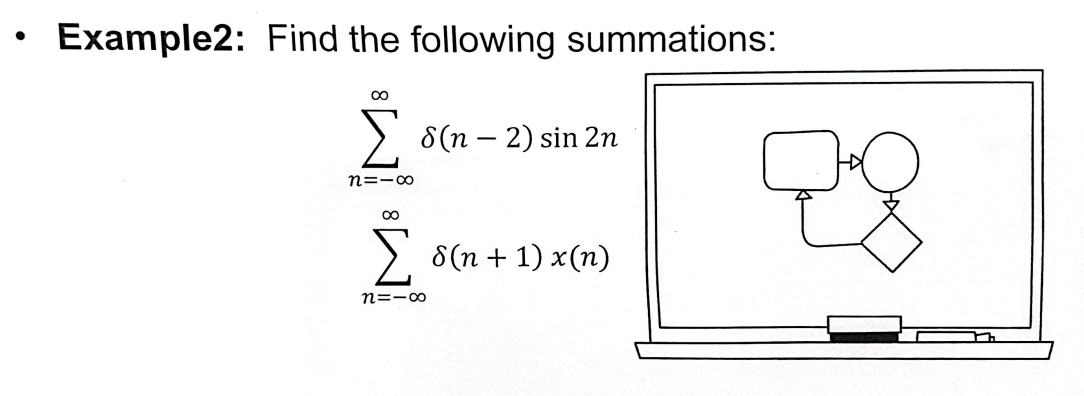

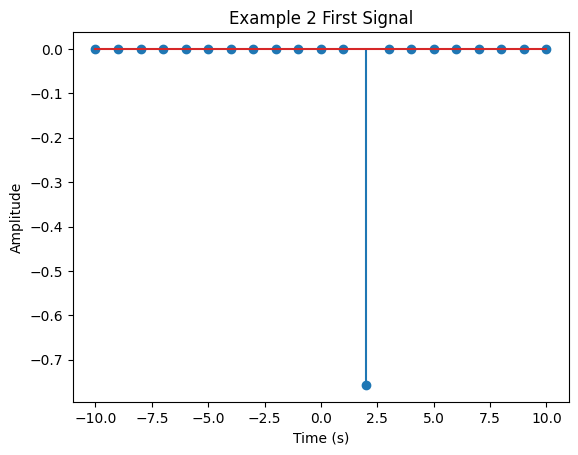

Summation: -0.7568024953079282


In [37]:
#First Signal
amplitude, time = impulse(-10, 10, 2)
sin_signal = np.sin(2 * time)
final_signal = amplitude * sin_signal
summation = np.sum(final_signal)

plt.stem(time, final_signal)
plt.title('Example 2 First Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(f'Summation: {summation}')

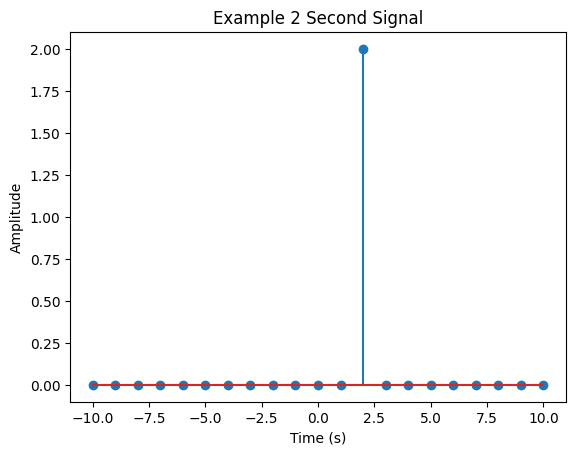

Summation: 2.0


In [38]:
#Second Signal
amplitude, time = impulse(-10, 10, 2)
x_signal = time #Since the output is equal to the input.
final_signal = amplitude * x_signal
summation = np.sum(final_signal)

plt.stem(time, final_signal)
plt.title('Example 2 Second Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(f'Summation: {summation}')

## Unit Step Sequence

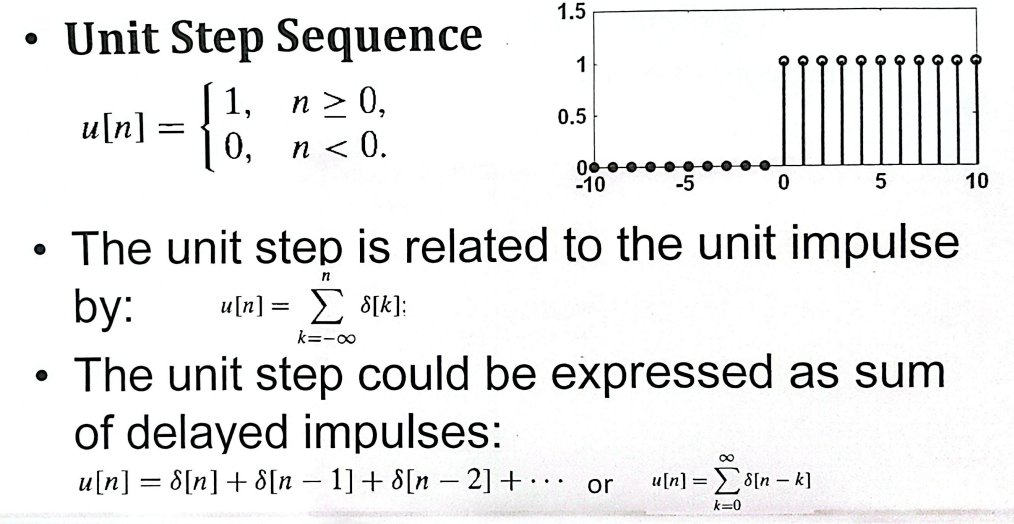

The following stack exchange explains how the unit step is related to the unit impulse: https://dsp.stackexchange.com/questions/48071/unit-step-signal-as-sum-of-impulses-from-mit-ocw-video

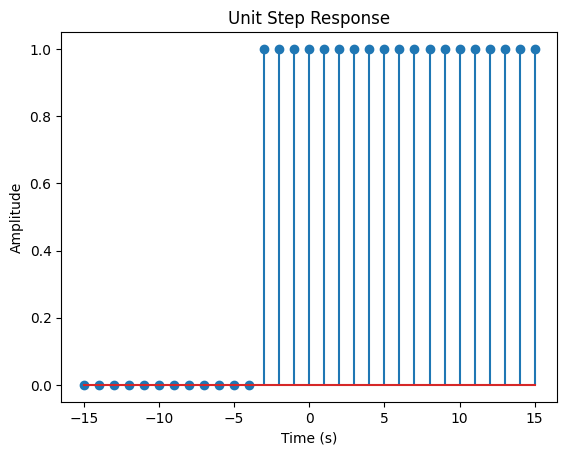

In [41]:
def step(begin, end, n, samples_per_second = 1):
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = np.zeros(shape = ((end - begin) * samples_per_second + 1))
    amplitude[(n - begin)*samples_per_second:] = 1
    return amplitude, time

amplitude, time = step(-15, 15, -3)
plt.stem(time, amplitude)
plt.title('Unit Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Real Value Exponential Sequences

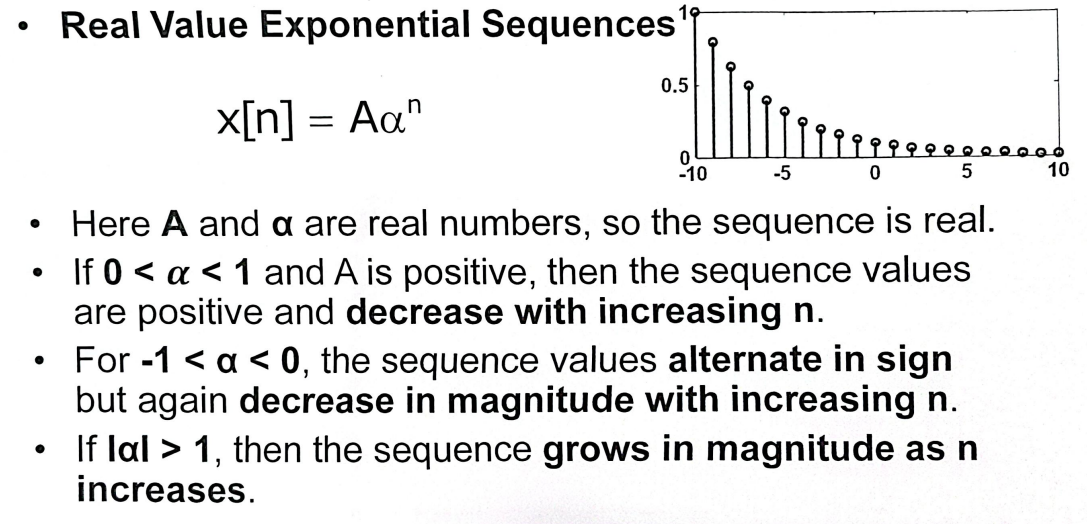

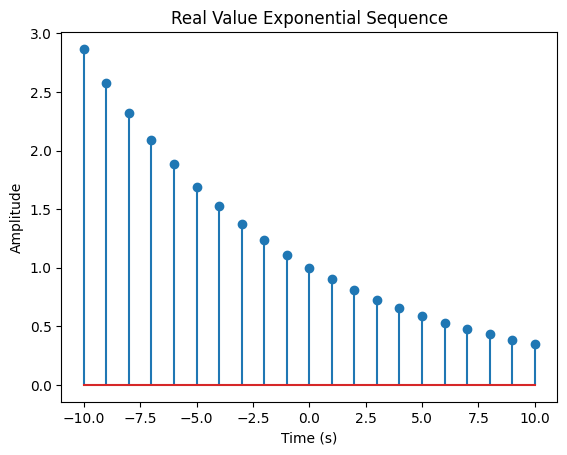

In [43]:
def exponential_sequence(begin, end, A, alpha, samples_per_second = 1):
    '''
    Implements: X[n] = A*alpha**(n),
    where A = scaling coefficient
    alpha = base
    n = exponent (time or x-axis)
    '''
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = A*alpha**time
    
    return amplitude, time

amplitude, time = exponential_sequence(-10, 10, 1, 0.9)

plt.stem(time, amplitude)
plt.title('Real Value Exponential Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
    

## Complex Value Exponential Sequences

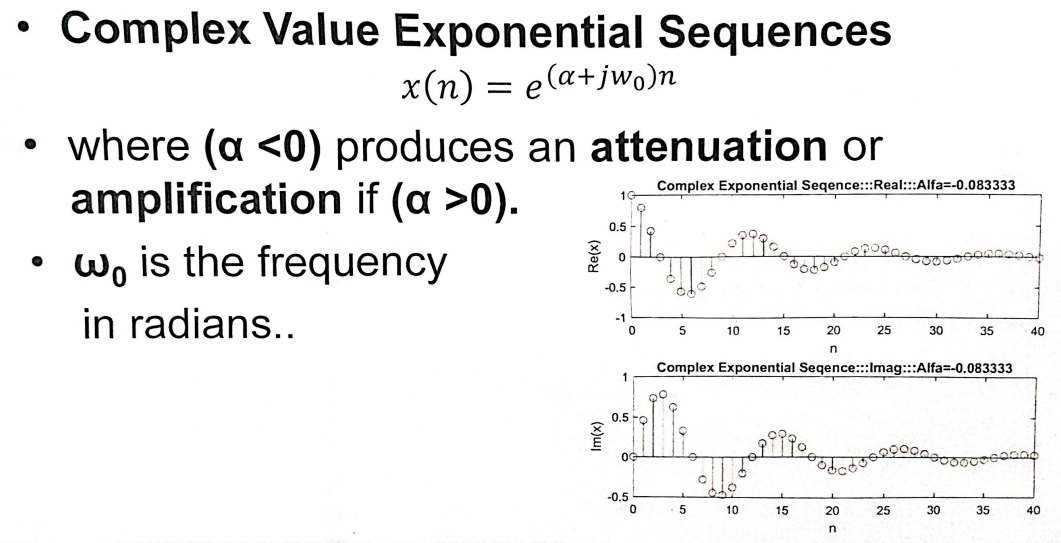

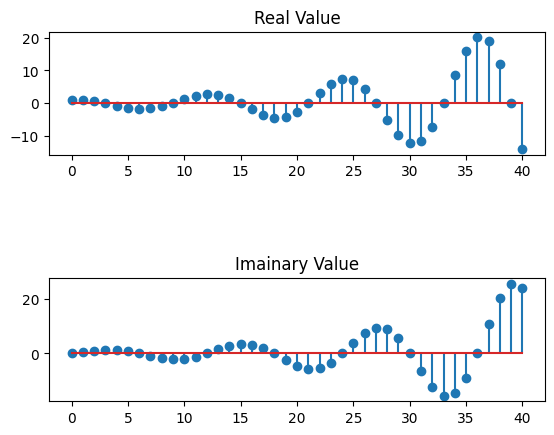

In [45]:
def complex_exponential_sequence(begin, end, alpha, w0, samples_per_second = 1):
    '''
    Implements x(n) = e**((alpha + j*w0)*n)
    alpha = attenuation scaler
    w0 = frequency in radians
    '''
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = np.exp((alpha + w0*1j)*time)
    
    return amplitude, time

amplitude, time = complex_exponential_sequence(0, 40, 1/12, np.pi/6)

plt.subplots_adjust(hspace = 1)
plt.subplot(2,1,1)
plt.title('Real Value')
plt.stem(time, amplitude.real)
plt.subplot(2,1,2)
plt.title('Imainary Value')
plt.stem(time, amplitude.imag)
plt.show()
    

## Sinusoidal Exponential Sequences

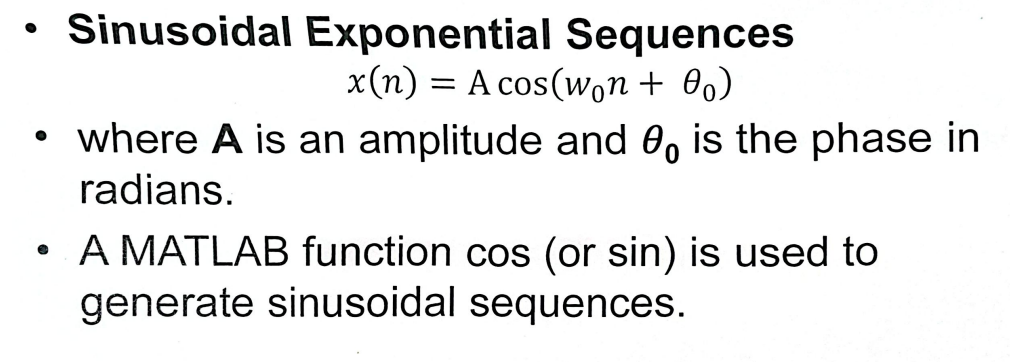

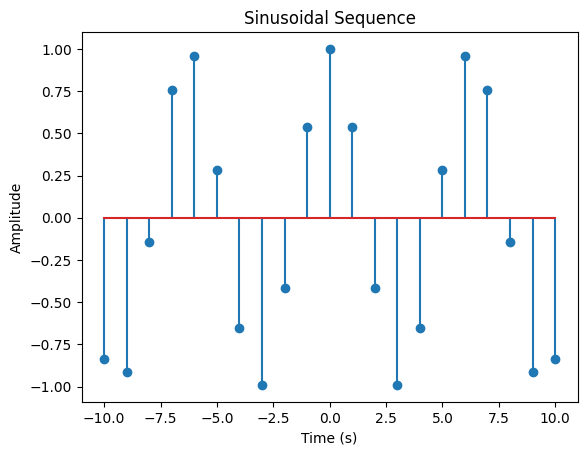

In [47]:
def sinusoidal_sequence(begin, end, A, w0, theta0, samples_per_second = 1):
    '''
    Implements: x(n) = A*cos(w0*n + theta0)
    A = scaler
    w0 = frequency
    theta0 = phase
    '''
    
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = A*np.cos(w0 * time + theta0)
    
    return amplitude, time

amplitude, time = sinusoidal_sequence(-10, 10, 1, 1, 0)
plt.stem(time, amplitude)
plt.title('Sinusoidal Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
    
    